### DataLoader

In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

from torch import nn
from torch import Tensor
from PIL import Image
from torchvision    import transforms
from torchvision.transforms import Compose, Resize, ToTensor
from einops import rearrange, reduce, repeat
from einops.layers.torch import Rearrange, Reduce
from torchsummary import summary

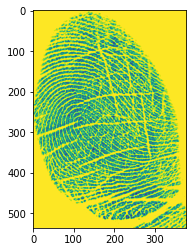

In [2]:
img = Image.open('../../images_02/00002447_00000001_slap_R_01.png')

fig = plt.figure()
plt.imshow(img)

In [3]:
# resize image
transform = Compose([Resize((224, 224)), ToTensor()])
x = transform(img)
x = x.unsqueeze(0) # add batch dim
x.shape

torch.Size([1, 1, 224, 224])

### Organize shape on array Example:

In [4]:
print(rearrange(np.arange(50), '(h n) -> h n', h=5).shape)# sinaliza de alguma forma que vai divir antes (h n)
print(rearrange(np.arange(50), '(h n) -> h n', h=10).shape)
print(rearrange(np.arange(50), '(h n) -> n h', h=10).shape)

(5, 10)
(10, 5)
(5, 10)


In [5]:
"""
# a grayscale image (of shape height x width)
>>> image = np.random.randn(30, 40)

# change it to RGB format by repeating in each channel
>>> repeat(image, 'h w -> h w c', c=3).shape
(30, 40, 3)
"""

"\n# a grayscale image (of shape height x width)\n>>> image = np.random.randn(30, 40)\n\n# change it to RGB format by repeating in each channel\n>>> repeat(image, 'h w -> h w c', c=3).shape\n(30, 40, 3)\n"

<Figure size 288x288 with 0 Axes>

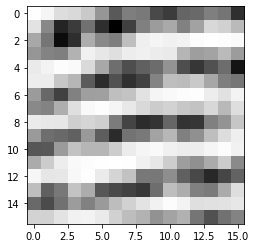

<Figure size 288x288 with 0 Axes>

In [6]:
# Operation patches | i can see patches
# when put (h w) or (s1 s2 c) significa flatten operation
patch_size = 16 # 16 pixels

# b = 1, c = 1, (h s1) = 224, (w s2) = 224

#(h w) = 14*14, # (s1 s2 c) = 1*16*16

"""A leitura que eu tenho disso é que de alguma forma s1 ou s2 será retirado de h e w respectivamente.
E assumirar outra posicao ou seja (h s1) = 224, implica dizer que s1 já estar contido dentro de h na forma
de m.m.c.

Por exemplo: quando eu coloco patch_size = 15 ele mostra esse error:

EinopsError: Shape mismatch, can't divide axis of length 224 in chunks of 15.

(h*w) Quantidade de blocos.
(s1*s2*c) tamanho do patch
"""
pathes = rearrange(x, 'b c (h s1) (w s2) -> b (h w) (s1 s2 c)', s1=patch_size, s2=patch_size)

fig = plt.figure()
plt.imshow((pathes[0,44,:].reshape(patch_size, patch_size)),cmap = 'gray')

plt.figure(figsize=(4, 4))


# plt.imshow(image.astype('uint8'))
# plt.axis('off')

# resized_image = tf.image.resize(
#     tf.convert_to_tensor([image]), size = (image_size, image_size)
# )

# patches = Patches(patch_size)(resized_image)
# print(f'Image size: {image_size} X {image_size}')
# print(f'Patch size: {patch_size} X {patch_size}')
# print(f'Patches per image: {patches.shape[1]}')
# print(f'Elements per patch: {patches.shape[-1]}')

# n = int(np.sqrt(patches.shape[1]))
# plt.figure(figsize=(4, 4))

In [7]:
from vit_transformer import ViT

model = ViT()

In [8]:
summary(model)

Layer (type:depth-idx)                   Param #
├─PatchEmbedding: 1-1                    --
|    └─Sequential: 2-1                   --
|    |    └─Conv2d: 3-1                  197,376
|    |    └─Rearrange: 3-2               --
├─TransformerEncoder: 1-2                --
|    └─TransformerEncoderBlock: 2-2      --
|    |    └─ResidualAdd: 3-3             2,363,904
|    |    └─ResidualAdd: 3-4             2,363,136
|    └─TransformerEncoderBlock: 2-3      --
|    |    └─ResidualAdd: 3-5             2,363,904
|    |    └─ResidualAdd: 3-6             2,363,136
|    └─TransformerEncoderBlock: 2-4      --
|    |    └─ResidualAdd: 3-7             2,363,904
|    |    └─ResidualAdd: 3-8             2,363,136
|    └─TransformerEncoderBlock: 2-5      --
|    |    └─ResidualAdd: 3-9             2,363,904
|    |    └─ResidualAdd: 3-10            2,363,136
|    └─TransformerEncoderBlock: 2-6      --
|    |    └─ResidualAdd: 3-11            2,363,904
|    |    └─ResidualAdd: 3-12            2,363,

Layer (type:depth-idx)                   Param #
├─PatchEmbedding: 1-1                    --
|    └─Sequential: 2-1                   --
|    |    └─Conv2d: 3-1                  197,376
|    |    └─Rearrange: 3-2               --
├─TransformerEncoder: 1-2                --
|    └─TransformerEncoderBlock: 2-2      --
|    |    └─ResidualAdd: 3-3             2,363,904
|    |    └─ResidualAdd: 3-4             2,363,136
|    └─TransformerEncoderBlock: 2-3      --
|    |    └─ResidualAdd: 3-5             2,363,904
|    |    └─ResidualAdd: 3-6             2,363,136
|    └─TransformerEncoderBlock: 2-4      --
|    |    └─ResidualAdd: 3-7             2,363,904
|    |    └─ResidualAdd: 3-8             2,363,136
|    └─TransformerEncoderBlock: 2-5      --
|    |    └─ResidualAdd: 3-9             2,363,904
|    |    └─ResidualAdd: 3-10            2,363,136
|    └─TransformerEncoderBlock: 2-6      --
|    |    └─ResidualAdd: 3-11            2,363,904
|    |    └─ResidualAdd: 3-12            2,363,

In [9]:
#x.shape
model.forward(x)

tensor([[ 1.4050,  0.7984, -0.2976, -0.0903,  0.4680, -0.2246,  0.1492, -0.5737,
          0.5063, -0.1298, -0.0438, -0.0103]], grad_fn=<AddmmBackward>)

### Training VIT

In [10]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

In [11]:
args={}
kwargs={}
args['batch_size']=5
args['test_batch_size']=5
args['epochs']=10  #The number of Epochs is the number of times you go through the full dataset. 
args['lr']=0.01 #Learning rate is how fast it will decend. 
args['momentum']=0.5 #SGD momentum (default: 0.5) Momentum is a moving average of our gradients (helps to keep direction).

args['seed']=1 #random seed
args['log_interval']=10
args['cuda']=True


In [12]:
#load the data
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.Compose([Resize((224, 224)),
                       transforms.ToTensor()#,
                       #transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=args['batch_size'], shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.Compose([Resize((224, 224)),
                       transforms.ToTensor()#,
                       #transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=args['test_batch_size'], shuffle=True, **kwargs)

criterion = torch.nn.CrossEntropyLoss()


In [13]:

def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        if args['cuda']:
            data, target = data.cuda(), target.cuda()
        #Variables in Pytorch are differenciable. 
        data, target = Variable(data), Variable(target)
        #This will zero out the gradients for this batch. 
        optimizer.zero_grad()
        output = model(data)
        # Calculate the loss The negative log likelihood loss. It is useful to train a classification problem with C classes.
        output = F.log_softmax(output, dim=1)
        
        loss = criterion(output,  target)
        #dloss/dx for every Variable 
        loss.backward()
        #to do a one-step update on our parameter.
        optimizer.step()
        #Print out the loss periodically. 
        if batch_idx % args['log_interval'] == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

def test():
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        if args['cuda']:
            data, target = data.cuda(), target.cuda()
        data, target = Variable(data, volatile=True), Variable(target)
        output = model(data)
        test_loss += F.nll_loss(output, target, size_average=False).data[0] # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).long().cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))




In [ ]:
#model = Net()
if args['cuda']:
    model.cuda()

optimizer = optim.SGD(model.parameters(), lr=args['lr'], momentum=args['momentum'])

for epoch in range(1, args['epochs'] + 1):
    train(epoch)
    test()


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.575899
Train Epoch: 1 [50/60000 (0%)]	Loss: 4.481823
Train Epoch: 1 [100/60000 (0%)]	Loss: 3.102627
Train Epoch: 1 [150/60000 (0%)]	Loss: 6.416216
Train Epoch: 1 [200/60000 (0%)]	Loss: 2.007169
Train Epoch: 1 [250/60000 (0%)]	Loss: 5.707759
Train Epoch: 1 [300/60000 (0%)]	Loss: 2.156163
Train Epoch: 1 [350/60000 (1%)]	Loss: 4.418743
Train Epoch: 1 [400/60000 (1%)]	Loss: 3.825426
Train Epoch: 1 [450/60000 (1%)]	Loss: 2.888053
Train Epoch: 1 [500/60000 (1%)]	Loss: 2.601784
Train Epoch: 1 [550/60000 (1%)]	Loss: 2.525752
Train Epoch: 1 [600/60000 (1%)]	Loss: 3.791602
Train Epoch: 1 [650/60000 (1%)]	Loss: 1.974908


In [ ]:
del model